In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Hypothesis:

Null: The lady tasting tea was lucky and guessed right. She is unable to distinguish The probability of her getting it right is .5.

Alternate: The lady can actually taste the difference.

Step 2: The test statistic is number of successfully identified teas and milks independently.

X: Number of times she correctly picked a cup poured with tea first.

X~ Hypergeometric(M = 8, n = 4, N = 4)

In the sample, the test statistic is 3. 

Step 3: Calculate p-value

In [2]:
M,n,N = 8,4,4
1-stats.hypergeom.cdf(2,M,n,N)

0.24285714285714288

Step 4: The p-value is greater than .05 so we fail to reject the null hypothesis. The data does not show that she can actually taste the difference.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [3]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: State Hypotheses:

Null: No difference in the sepal width.

Alternate: The virginica species has a larger mean sepal width than the versicolor.

Step 2: X: Difference in sample of sepal width mean between virginica and versicolor. 

For the sample the test statistic is (2.974 - 2.77 = 0.204).

Step 3: ...

In [4]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs
iris_sub

species,sepal_width
versicolor,3.2
versicolor,3.2
versicolor,3.1
versicolor,2.3
versicolor,2.8
versicolor,2.8
versicolor,3.3
versicolor,2.4
versicolor,2.9
versicolor,2.7


In [5]:
num_obs = iris_sub.num_rows
ts = []
for _ in np.arange(10000):
    iris_sample = iris_sub.with_column("sampled", iris_sub.sample(num_obs, with_replacement=False).column(1))
    ts = np.append(ts, np.diff(iris_sample.group(0,np.mean).column(2))[0])

In [6]:
np.mean(ts>=.204)

0.0009

Step 4: We reject the null hypothesis because the p-value is less than 0.05. That means that the virginica species has a larger sepal width than the versicolor species.

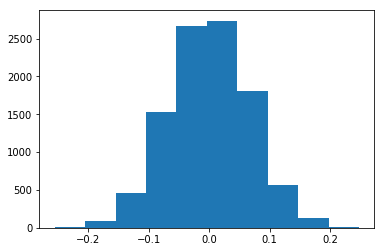

In [7]:
plt.hist(ts)
plt.show()